##### Run instruction: Cell -> Run all
#### My 5 openings: four_knights, caro_kann_classic, qid4e3, sicilian_rossolimo, sicilian_dragon_other6

### Importing required libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Openings and their mapping to moves and files

In [62]:
opening_moves = {
    'sicilian_dragon_other6': {'moves': 'e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6','number_of_moves': 10}, 
         'caro_kann_classic': {'moves': 'e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5', 'number_of_moves': 8}, 
                    'qid4e3': {'moves': 'd4 Nf6 c4 e6 Nf3 b6 e3', 'number_of_moves': 7}, 
              'four_knights': {'moves': 'e4 e5 Nf3 Nc6 Nc3 Nf6', 'number_of_moves': 6}, 
        'sicilian_rossolimo': {'moves': 'e4 c5 Nf3 Nc6 Bb5','number_of_moves': 5}, 
            }

# (sorted(opening_moves.items(), key = lambda x: x[1]['number_of_moves'], reverse=True))

name_of_opening = {'e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6': 'sicilian_dragon_other6',
                  'e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5': 'caro_kann_classic',
                  'd4 Nf6 c4 e6 Nf3 b6 e3': 'qid4e3',
                   'e4 e5 Nf3 Nc6 Nc3 Nf6': 'four_knights',
                   'e4 c5 Nf3 Nc6 Bb5': 'sicilian_rossolimo',
                  }

opening_patterns = list(name_of_opening.keys())

possible_no_of_moves_in_an_opening = [10,8,7,6,5]


In [63]:
opening_files = { 'four_knights':'FourKnights.txt', 'caro_kann_classic':'Caro-KannClassic.txt', 'qid4e3': 'QID4e3.txt',
          'sicilian_rossolimo': 'SicilianRossolimo.txt', 'sicilian_dragon_other6':'SicilianDragonOther6.txt'}


### Data 
##### The data is in a txt file
##### Each record(game) is separared by new line character (/n)
#### And each game contains /n between Game details and moves

How a single Game data looks:

[Event "DSB-11. Kongress"] <br>
[Site "Koeln"] <br>
[Date "1898.??.??"] <br>
[Round "9"] <br>
[White "Charousek, Rudolf Rezso"] <br>
[Black "Von Popiel, Ignatz"] <br>
[Result "1-0"] <br>
[WhiteElo ""] <br>
[BlackElo ""] <br>
[ECO "B19"] <br>

1.e4 c6 2.d4 d5 3.Nc3 dxe4 4.Nxe4 Bf5 5.Ng3 Bg6 6.Nf3 e6 7.h4 h6 8.Bd3 Bxd3
9.Qxd3 Nd7 10.Bf4 Ngf6 11.O-O-O Qa5 12.Kb1 O-O-O 13.Nf1 Be7 14.N1d2 Nc5 15.Qe2 Nd5
16.dxc5 Nxf4 17.Qe4 Nd5 18.Ne5 Rhf8 19.Nxf7 Bf6 20.Nc4 Nc3+ 21.bxc3 Qxc3
22.Nfe5 Rd5 23.Rxd5 cxd5 24.Qf3 Qb4+ 25.Nb2 Qxb2+ 26.Kxb2 Bxe5+ 27.Kb3 Rxf3+
28.gxf3 Bd4 29.Rg1 Kd7 30.c3 Bf6 31.h5 Kc6 32.f4 Kxc5 33.Re1 Kd6 34.Kc2 b6
35.Kd3 a5 36.a4 Kd7 37.f3 Kd6 38.Rb1 Kc7 39.c4 Kc6 40.Rb5 Be7 41.f5 dxc4+
42.Kxc4 exf5 43.Rxf5 Bf6 44.f4 Kd6 45.Rb5 Kc6 46.f5 Bg5 47.Re5 Bf6 48.Re6+ Kc7
49.Kb5 Bd4 50.Rc6+ Kd7 51.Rc4 Bc5 52.Rg4 Ke7 53.Rxg7+ Kf6 54.Rg6+ Kxf5 55.Rxh6  1-0

#### Code to Find Opening

In [64]:
def find_opening(moves):
    for num in possible_no_of_moves_in_an_opening:

        firstXmoves = " ".join((moves.split(' '))[0:num])
        if firstXmoves in opening_patterns:
            return name_of_opening[firstXmoves]

    return 'unidentified' 
    


### Testing "find_opening" function

In [65]:
movvv = ['e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 Nf3 Nd7 O-O Be7 Qe2 Ngf6 Bf4 Nd5 Bc1 O-O Bb3 a5 a3 Qb6 Rd1 Rfe8 Ne4 a4 Ba2 c5 c4 N5f6 Nxf6+ Bxf6 Be3 Rac8 Rd2 Bh5 dxc5 Nxc5 h3 Qa6 g4 Bg6 Nd4 Red8 g5 Be7 h4 e5 Nb5 Rxd2 Bxd2 Qe6 Nc3 Bd6 Nd5 Qh3 Qf1 Qxh4 Qg2 e4 Re1 Nd3 Re3 Qh5 f3 Nf4 Nxf4 Bxf4 Rc3 exf3 Rxf3 Bxd2 c5 Re8',
         'e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Qe2 Qxe2+ Kxe2 Nxd5 Bd2 Nxc3+',
         'd4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 Be7 O-O O-O b3 d5 Bb2 Nbd7 Nc3 c5 cxd5 Nxd5 Nxd5 Bxd5 Qe2 cxd4 Nxd4 Nc5 Bc4 Rc8',
         'e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 Bg7 Bg2 O-O O-O Bg4 h3 Bxe2 Qxe2 Rc8 Be3 Nd7 Nd1 Nd4 Bxd4 Bxd4 c3 Bg7 Ne3 Rc5 Rad1 b5 Rd5 Qb8 Rfd1 Re8 Rxc5 Nxc5 Nd5 a5 a3 e6 Ne3 b4 axb4 axb4 cxb4 Qxb4 Rxd6 Qxb2 Qc4 Rc8',
         'e4 c5 Nf3 Nc6 Bb5 g6 O-O Nf6 Re1 Bg7 c3 a6 Bxc6 bxc6 e5 Nd5 d4 cxd4 c4 Nc7 Nxd4 c5 Nb3 Ne6 Nc3 Bb7 Nd5 d6 Nf4 O-O Nxe6 fxe6 Qg4 Rf5 Bf4 Qc7 Rad1 d5 cxd5 Bxd5 Bg3 Qc6 Rc1 Bxg2 Rxc5 Qb7 Na5 Qf3 Qxf3 Bxf3 Nc6 Rf7 b4 g5 a4 h5 h3 h4 Bh2 Bh6 b5 axb5 axb5 g4 b6 g3 fxg3 Ra1 Rxa1 Be3+ Kf1 Bxc6+ Ke1 Bxc5 Rc1 Bf2+ Kd2 Bd5 gxh4 Bxb6',
         'Ng3 Bg6 Bc4 e6 Nf3 Nd7 O-O Be7 Qe2 Ngf6 Bf4 Nd5 Bc1 O-O Bb3 a5 a3 Qb6'
        ]

for item in movvv:
    print(find_opening(item))

# carokan 1
#fourK - 2
# QI - 3
# SD - 4


caro_kann_classic
four_knights
qid4e3
sicilian_dragon_other6
sicilian_rossolimo
unidentified


#### Code to Format Moves

In [66]:
import string, re
def format_moves(moves):
    #flag = False
    
    res = ""
    x = moves.split('.')
    for item in x[1:]:  
        y = (item.split(' '))[:2]  
            
        if (len(y)) > 1 and len(y[1]) > 0:
            y1_fmt = re.search(r'([NBRQK])?([a-h])?([1-8])?(x)?([a-h][1-8])(=[NBRQK])?(\+|#)?|^O-O(-O)?', y[1] )
            if y1_fmt and y1_fmt.group(0):
                res = res + " " + y[0] + " " + y1_fmt.group(0)
        else:
            res = res + " " + y[0]
    res = res.strip()
    return res

#### Getting data into a list format

In [67]:
def get_data_in_list_format(file):
    f = open(file, "r")
    cur = []
    dfc = []
    moves = ""
    n_count = 0
    
    for line in f:
        if line == '\n':
            n_count +=1
        if n_count == 1:
            moves = moves + line.strip()
        elif n_count == 2:
            if len(cur)!=10:
                cur.append(" ")
            moves_fmt = format_moves(moves)
            #cur.append(moves_fmt)
            opening = find_opening(moves_fmt)
            cur.extend([moves_fmt, opening])
            dfc.append(cur[2:]) #removing Event, Place
            cur = []
            n_count = 0
            moves = ""
        else:
            x = ((line.strip())[1:-1]).replace(',', ' ').split(' ', 1)
            cur.append(x[1])
    
    return dfc


In [68]:
def check_df(dfc):
    df = pd.DataFrame(dfc)
    print(df.head(1))

In [69]:
def get_dataframe(dfc):
    df = pd.DataFrame(dfc, columns=['Date', 'Round', 'White', 'Black', 'Result', 'WhiteElo', 'BlackElo', 'ECO', 'Moves', 'Opening'])

    df['Year'] = df.Date.str[1:5]
    df.reset_index(inplace=True)
    df.replace('"', '', regex=True, inplace=True)
    
    df["WhiteElo"] = pd.to_numeric(df["WhiteElo"])
    df["BlackElo"] = pd.to_numeric(df["BlackElo"])
    df["Year"] = pd.to_numeric(df["Year"])

    
    df['game_result'] = np.where(
        df['Result'] == "1-0", "white", np.where( #white wins,1
        df['Result'] ==  "0-1", "black", np.where(  #black wins,2
        df['Result'] ==  "1/2-1/2", "draw", '')))  #draw,0

    
    df.drop(['Round', 'Date', 'Result'], axis=1, inplace=True)
    df.replace('', np.NaN, inplace=True)


    return df
          
    

### Getting insights from data and Filtering the data
#### 1. Getting count of number of records in each column
#### 2. Checking Null values: 
* The missing values are high for Elo rating of Players.
Since it's an important factor in the analysis, replacing these missing values with mean or some other value, might harm the analysis. Hence we are dropping the rows that contains missing values.
* The game_result is missing for 1-4 records, which are dropped.

#### 3. Dropping Rows with Elo rating < 2000 (also checking for number of records for a range of Elo Rating)
#### 4. Checking for number of records for Year > 2000 and <2000
#### 5. Dropping Rows where openings are not identified
#### 6. Plotting Win statistics

In [70]:
def get_insights_and_filter_data(df, opening):
    
    #Finding stastistical information of some columns
    cols_stats = ['WhiteElo', 'BlackElo', 'Year']
    print("\n ---------Count ---------")
    print(df.count())

    #checking for null
    print("\n ---------Null values---------")
    print(df.isna().sum())

    df.dropna(inplace=True, subset=['WhiteElo', 'BlackElo', 'game_result', 'Moves'])
    print(f"\nNo of records after dropping NaN: {len(df)}")
    
    c = df.loc[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)]
    print(f"\nNo of records for EloRating <1500: {len(c)}")
    
    d = df.loc[(df['WhiteElo'] >= 1500) & (df['BlackElo'] >= 1500) & (df['WhiteElo'] < 2000) & (df['BlackElo'] < 2000)]
    print(f"\nNo of records for EloRating >1500 snd <2000: {len(d)}")
    
    df = df.loc[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)]
    print(f"\nNo of records for EloRating >2000: {len(df)}")
    
    a = df[df['Year']>2000]
    print(f"\nNo of records for Year >2000: {len(a)}")

    b = df[df['Year']<2000]
    print(f"\nNo of records for Year <2000: {len(b)}\n")
    
    #dropping rows where opening is unidentified
    df = df.loc[df['Opening'] != 'unidentified']
    num_of_rows = len(df)
    print(f"\nNo of records after dropping unidentified openings / Final count of data: {len(df)}")
    
    print("\nWin statistics :")
    print(df['game_result'].value_counts())
    
    plt.figure()
    df['game_result'].value_counts().plot(kind='bar', title='win statistics for '+ opening + 'opening, Number of Games:' + str(num_of_rows) )
    
    return df
    

### Getting files from different input files and writing it into a single file



===================================  FourKnights===================================

 ---------Count ---------
index          23921
White          23921
Black          23921
WhiteElo       17510
BlackElo       17342
ECO            23921
Moves          23921
Opening        23921
Year           23921
game_result    23917
dtype: int64

 ---------Null values---------
index             0
White             0
Black             0
WhiteElo       6411
BlackElo       6579
ECO               0
Moves             0
Opening           0
Year              0
game_result       4
dtype: int64

No of records after dropping NaN: 15975

No of records for EloRating <1500: 119

No of records for EloRating >1500 snd <2000: 756

No of records for EloRating >2000: 13093

No of records for Year >2000: 9440

No of records for Year <2000: 3447


No of records after dropping unidentified openings / Final count of data: 10066

Win statistics :
draw     4424
white    2989
black    2653
Name: game_result, dtype: int64


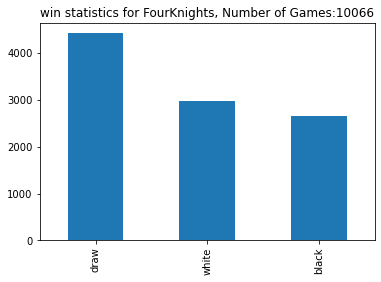

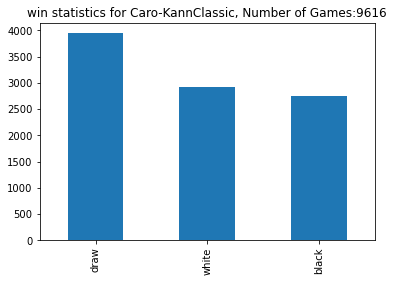

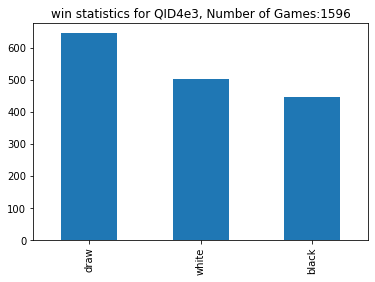

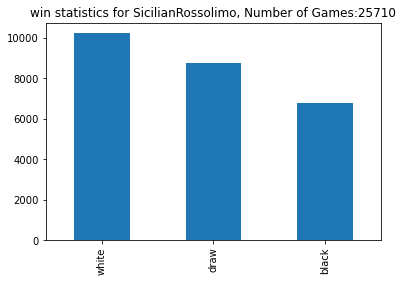

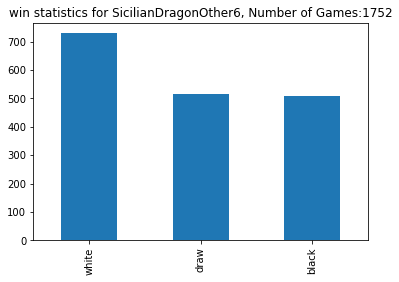

In [71]:
import time

start = time.time()
header_exists = False

for key in opening_files:
    print("\n\n===================================  " + opening_files[key][:-4] +   "===================================")
    dfc = get_data_in_list_format("data/" + opening_files[key])
    #check_df(dfc)
    df = get_dataframe(dfc)
    df = get_insights_and_filter_data(df, opening_files[key][:-4])
    if header_exists:
        df.to_csv('data/output/output.csv' ,mode='a', header=False)
    else:
        df.to_csv('data/output/output.csv')
        header_exists = True
        
end = time.time()
print('\nTime:')
print(end - start)

### old code, unused currently
#### function to get moves in a list so that it can later be split into columns

In [72]:
#import string, re
def pre_process_moves_old(moves):
    res = []
    x = moves.split('.')
    for item in x[1:]:
        y = (item.split(' '))[:2]
        if y[1]:
            y1_fmt = re.search(r'([NBRQK])?([a-h])?([1-8])?(x)?([a-h][1-8])(=[NBRQK])?(\+|#)?|^O-O(-O)?', y[1] )
            if y1_fmt.group(0):
                res.extend([y[0], y1_fmt.group(0)])
        else:
            res.append(y[0])
    
    return res


# code to split the list into columns

# df2 = pd.DataFrame(df.Moves.values.tolist(), index= df.index)
# merge_df = pd.merge(df, df2, left_index=True, right_index=True)


# def prep_training(df, first_n_moves):
#     cols = []
#     for i in range(0,first_n_moves*2,2):
#         cols.extend([i, i+1])
#     cols.extend(['WhiteElo', 'BlackElo', 'opening'])
#     print(cols)
    
#     x = df[cols]
#     y = df.iloc[:, 10]

#df['Moves'].unique()
#df.loc[df['Moves'] == '']
# for row in mdf.iterrows():
#     print(row)